In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.manifold import TSNE

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score

from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
import pickle

file_path = "../wav2vec2_vectors/pt/layer_reprs_large_pooled_pt.pkl"

with open(file_path, "rb") as file:
    layer_reprs = pickle.load(file)


In [4]:
file_path = "../wav2vec2_vectors/pt/layer_reprs_large_pooled_ft_s2t.pkl"

with open(file_path, "rb") as file:
    layer_reprs_ft_st2 = pickle.load(file)

In [5]:
import os

audio_folder = 'spoken_digit/speech_data'
audio_files = []

for file in os.listdir(audio_folder):
    if file.endswith('.wav') or file.endswith('.mp3'):
        audio_files.append(os.path.join(audio_folder, file))



In [6]:

metadata = {}

for file in audio_files:
    file_name = os.path.basename(file)
    label, speaker_id, sample_number = file_name.split('_')
    
    # Store metadata
    metadata[file_name] = {
        'label': label,
        'speaker_id': speaker_id,
        'sample_number': sample_number.split('.')[0]
    }


In [7]:
metadata[audio_files[0].split('/')[-1]]

{'label': '2', 'speaker_id': 'theo', 'sample_number': '29'}

In [8]:
# Get metadata in lists 
# Iterate over the layers and plot the representations
speaker_ids, labels = [], []

for sample_ID in layer_reprs:
    speaker_id = metadata[sample_ID]['speaker_id']
    label = int(metadata[sample_ID]['label'])

    speaker_ids.append(speaker_id)
    labels.append(label)

In [9]:
digit2word = {
    0: 'zero',
    1: 'one',
    2: 'two',
    3: 'three',
    4: 'four',
    5: 'five',
    6: 'six',
    7: 'seven',
    8: 'eight',
    9: 'nine'
}

In [10]:
type(layer_reprs)

collections.defaultdict

In [11]:
layer_reprs.keys()

dict_keys(['2_theo_29.wav', '5_nicolas_22.wav', '4_lucas_18.wav', '3_theo_22.wav', '8_lucas_27.wav', '1_yweweler_6.wav', '3_yweweler_22.wav', '6_yweweler_28.wav', '0_jackson_18.wav', '4_george_1.wav', '7_jackson_5.wav', '9_jackson_49.wav', '5_george_45.wav', '5_theo_11.wav', '9_lucas_3.wav', '1_george_44.wav', '8_lucas_0.wav', '8_yweweler_28.wav', '9_nicolas_42.wav', '4_jackson_26.wav', '1_yweweler_10.wav', '4_jackson_45.wav', '9_lucas_32.wav', '4_lucas_2.wav', '3_lucas_18.wav', '8_yweweler_46.wav', '8_nicolas_26.wav', '4_lucas_6.wav', '0_theo_28.wav', '5_jackson_24.wav', '6_nicolas_28.wav', '1_george_31.wav', '6_yweweler_44.wav', '4_jackson_4.wav', '6_george_19.wav', '1_nicolas_17.wav', '8_lucas_9.wav', '5_jackson_40.wav', '9_jackson_38.wav', '1_jackson_47.wav', '2_nicolas_10.wav', '2_theo_37.wav', '7_jackson_23.wav', '0_jackson_9.wav', '4_nicolas_10.wav', '1_george_47.wav', '7_george_40.wav', '3_yweweler_36.wav', '8_theo_34.wav', '4_theo_40.wav', '9_nicolas_28.wav', '4_theo_43.wav', 

In [12]:
layer_reprs['0_george_44.wav'][0].shape

(1024,)

In [16]:
layer_reprs[sample_ID][12].shape

(1024,)

In [51]:
# from sklearn.preprocessing import StandardScaler

# # Create an instance of StandardScaler
# scaler = StandardScaler()

# # Apply standardization to each vector in layer_reprs
# layer_reprs_scaled = defaultdict(list)

# num_layers = len(layer_reprs[list(layer_reprs.keys())[0]])

# for layer_index in range(0, num_layers):
#     for sample_ID in layer_reprs:
#         layer_reprs_scaled[sample_ID].append(scaler.fit_transform(layer_reprs[sample_ID][layer_index]))

In [69]:
thresholds = {
    22: {'+': 100, '-': -100},
    23: {'+': 1900, '-': -1600},
    24: {'+': 3800, '-': -3050},
}

def calculate_tsne_layer_representations(layer_reprs):
    """
    Calculates T-SNE layer representations for each layer in the given layer representations.

    Args:
        layer_reprs (dict): A dictionary containing layer representations for each sample ID.

    Returns:
        list: A list of T-SNE layer representations for each layer.
    """
    tsne_layer_representations = []

    num_layers = len(layer_reprs[list(layer_reprs.keys())[0]])
    

    for layer_index in range(22, num_layers):
        # Extract representations from the specified layer
        layer_representations = []

        for sample_ID in layer_reprs:
            vec = layer_reprs[sample_ID][layer_index]

            # Apply thresholding to the representations
            _eta_p = thresholds[layer_index]['+']
            _eta_n = thresholds[layer_index]['-']
            vec = [x if x < _eta_p  else 0 for x in vec]
            vec = [x if x > _eta_n  else -1*0 for x in vec]
            
            layer_representations.append(vec)
            #layer_representations.append()

        # Convert the representations to a NumPy array
        layer_representations = np.array(layer_representations)

        # Apply standardization to the layer representations
        layer_representations = scaler.fit_transform(layer_representations)

        #print(layer_representations.shape)

        # Perform T-SNE dimensionality reduction
        tsne = TSNE(n_components=2, random_state=42, perplexity=50)
        tsne_representation = tsne.fit_transform(layer_representations)

        tsne_layer_representations.append(tsne_representation)

    return tsne_layer_representations

In [70]:

# values1= layer_reprs[sample_ID][23]
# values2 = layer_reprs[sample_ID][22]
# values3 = layer_reprs[sample_ID][21]
# values4 = layer_reprs[sample_ID][20]
# values5 = layer_reprs[sample_ID][19]

# plt.hist(values1, bins=1000)
# plt.hist(values2, bins=1000)
# plt.hist(values3, bins=1000)
# plt.hist(values4, bins=1000)
# plt.hist(values5, bins=1000)
# plt.xscale('log')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('Line Plot of layer_reprs[sample_ID][23]')
# plt.show()

# #

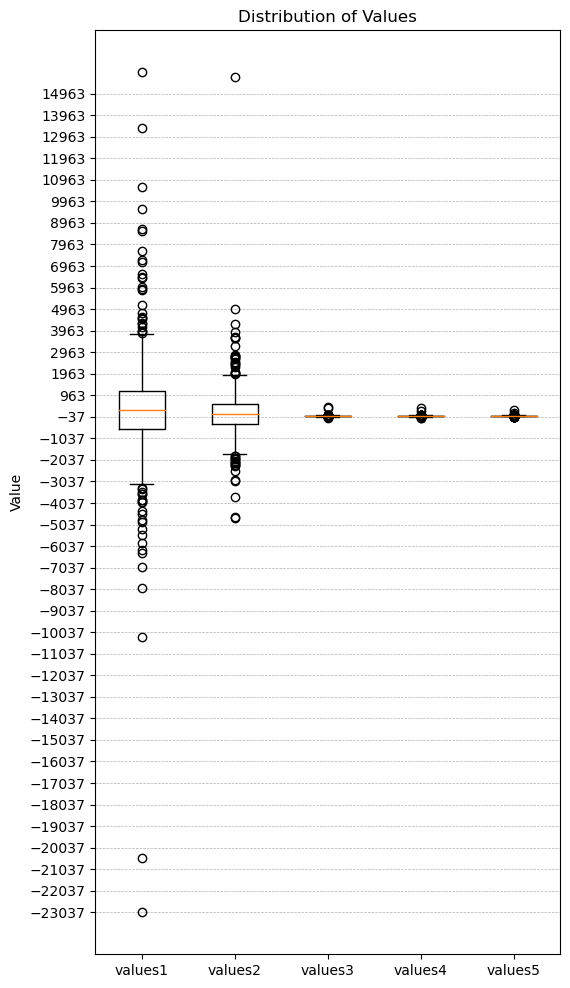

In [71]:
import matplotlib.pyplot as plt

# Define the values
values1 = layer_reprs[sample_ID][23]
values2 = layer_reprs[sample_ID][22]
values3 = layer_reprs[sample_ID][21]
values4 = layer_reprs[sample_ID][20]
values5 = layer_reprs[sample_ID][19]

# Create a box plot
fig, ax = plt.subplots(figsize=(6, 12))
# Create a list of values
_values = [values1, values2, values3, values4, values5]

# Create a box plot
plt.boxplot(_values)

# Set the x-axis tick labels
plt.xticks(range(1, len(_values) + 1), ['values1', 'values2', 'values3', 'values4', 'values5'])

# Set the y-axis label
plt.ylabel('Value')
#plt.yscale('log')
# Set the title of the plot
plt.yticks(range(int(min(values1)), int(max(values1)), 1000))
plt.title('Distribution of Values')
plt.grid(axis='y', which='major', linestyle='--', linewidth=0.5)


#plt.grid()
# Show the plot
plt.show()


In [72]:

def plot_tsne(tsne_representation, labels, label2word, figsave_name):
    """
    Plots 2D t-SNE representations for each layer.

    Parameters:
    - tsne_representation (list of numpy arrays): List of t-SNE representations for each layer.
    - labels (numpy array): Array of labels for each data point.
    - label2word (dict): Dictionary mapping label indices to corresponding words.

    Returns:
    - None

    This function plots t-SNE representations for each layer in a grid of subplots. Each subplot represents a layer,
    and the t-SNE representations are plotted as scatter plots. The color of each data point in the scatter plot
    corresponds to its label. The legend at the bottom of the plot shows the color labels and their corresponding words.
    """
    
    # Define the number of rows and columns for the subplot matrix
    num_rows = len(tsne_representation) #// 5
    num_cols = 5

    # Create a new figure and set the size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 2*num_rows))

    # Flatten the axes array
    axes = axes.flatten()

    # Iterate over the layers and plot t-sne representations
    for i, tsne_rep in enumerate(tsne_representation):

        # Plot the representations in the current subplot
        scatter = axes[i].scatter(tsne_rep[:, 0], tsne_rep[:, 1], c=labels, cmap='tab10', alpha=0.1, marker='.')
        axes[i].set_title(f'Layer {i}', fontsize=10)
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    # Remove any extra subplots
    for j in range(len(axes)):
        if j >= len(tsne_representation):
            fig.delaxes(axes[j])



    # Add legend with color labels at the bottom
    legend_labels = [label2word[i].upper() for i in np.unique(labels)]

    legend_handles = [
        plt.Line2D(
            [0], 
            [0], 
            marker='.', 
            color='w', 
            markerfacecolor=scatter.get_cmap()(scatter.norm(label)), markersize=10) for label in np.unique(labels)
        ]

    fig.legend(legend_handles, legend_labels, loc='lower center', ncol=len(legend_labels), bbox_to_anchor=(0.5, -0.05))
    
    # Adjust the spacing between subplots
    fig.tight_layout()
    #fig.savefig('Figures/' + figsave_name, dpi=600,  bbox_inches='tight')

    plt.show()

In [73]:
tsne_layer_representations_large_pt = calculate_tsne_layer_representations(layer_reprs)

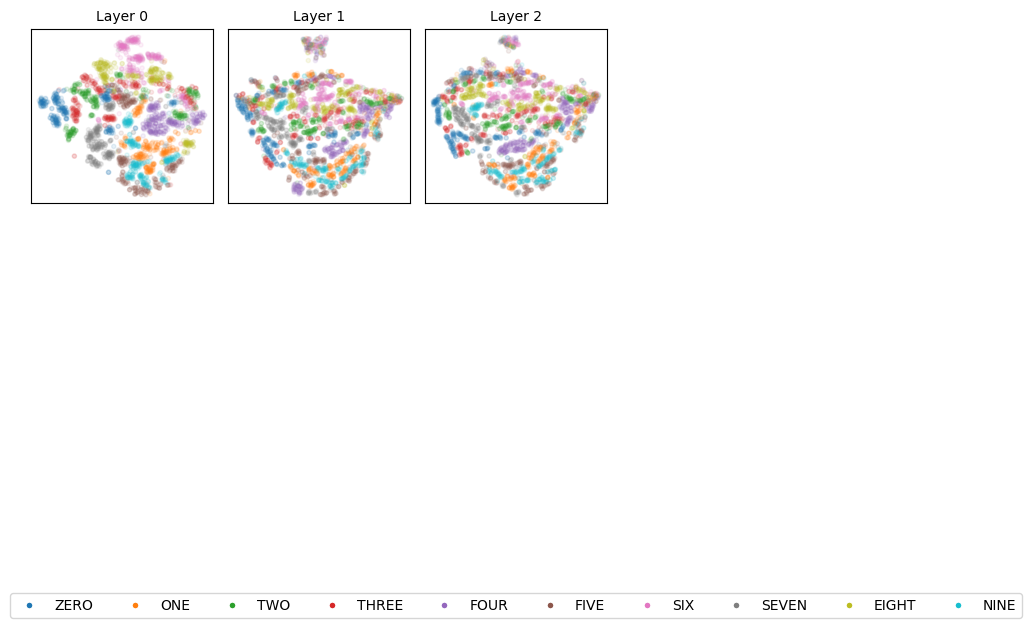

In [74]:
plot_tsne(tsne_layer_representations_large_pt, labels, digit2word, 'w2v2_large_pt_scaled.png')

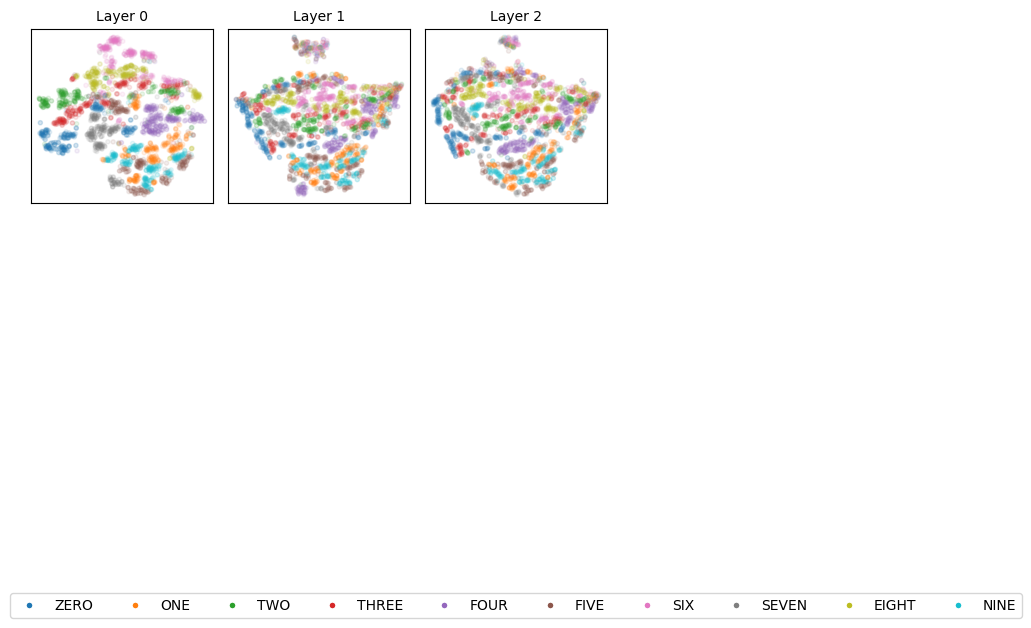

In [68]:
plot_tsne(tsne_layer_representations_large_pt, labels, digit2word, 'w2v2_large_pt_scaled.png')

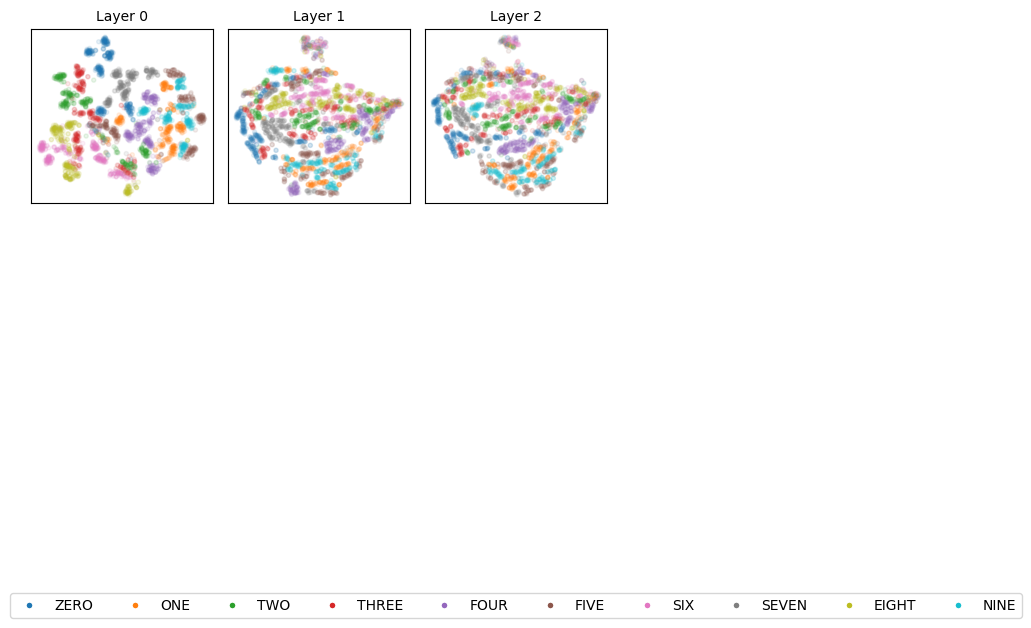

In [57]:
plot_tsne(tsne_layer_representations_large_pt, labels, digit2word, 'w2v2_large_pt_scaled.png')a

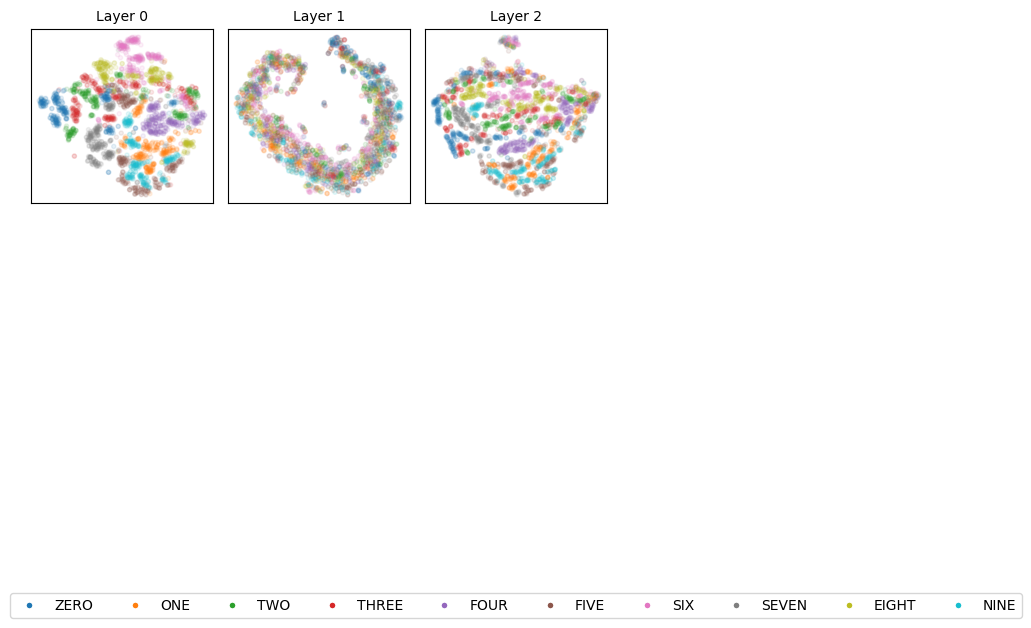

In [41]:
plot_tsne(tsne_layer_representations_large_pt, labels, digit2word, 'w2v2_large_pt_scaled.png')

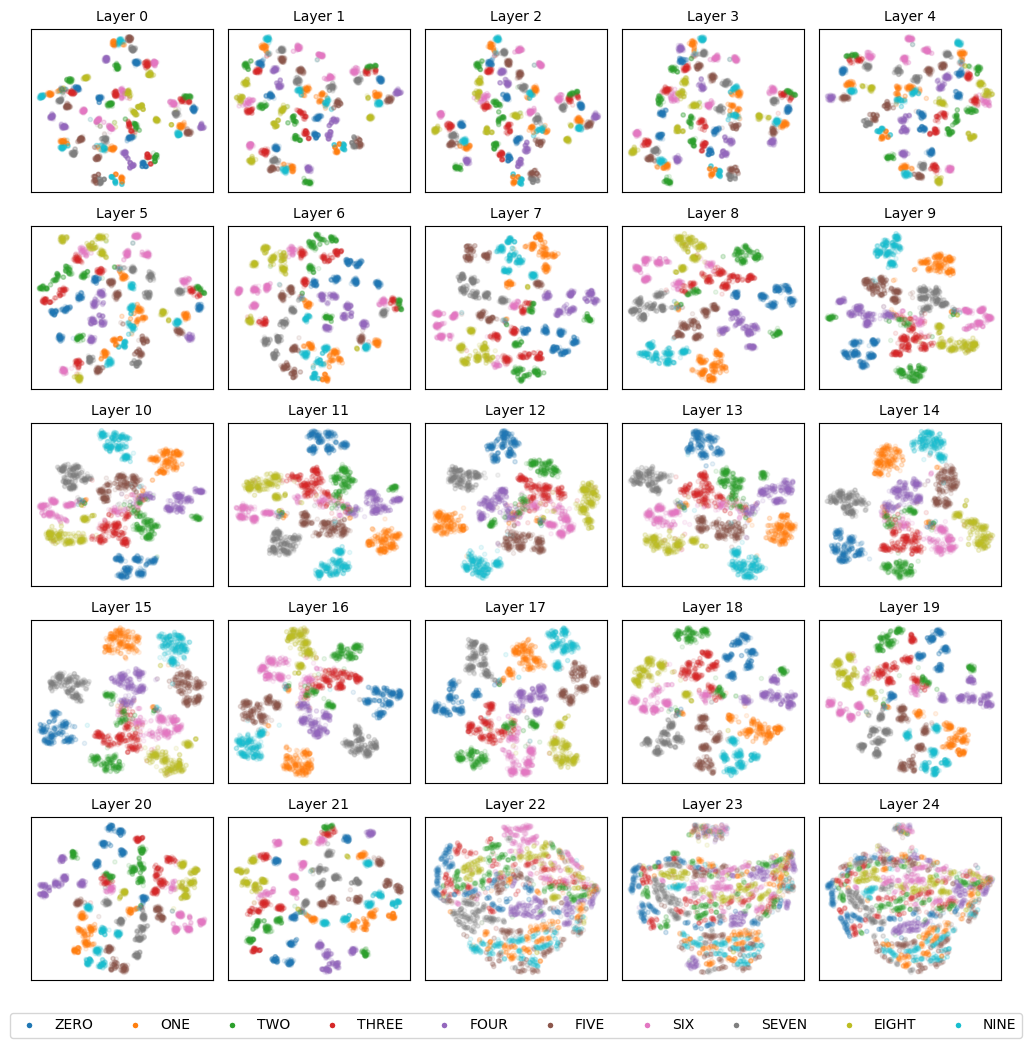

In [22]:
plot_tsne(tsne_layer_representations_large_pt, labels, digit2word, 'w2v2_large_pt_scaled.png')

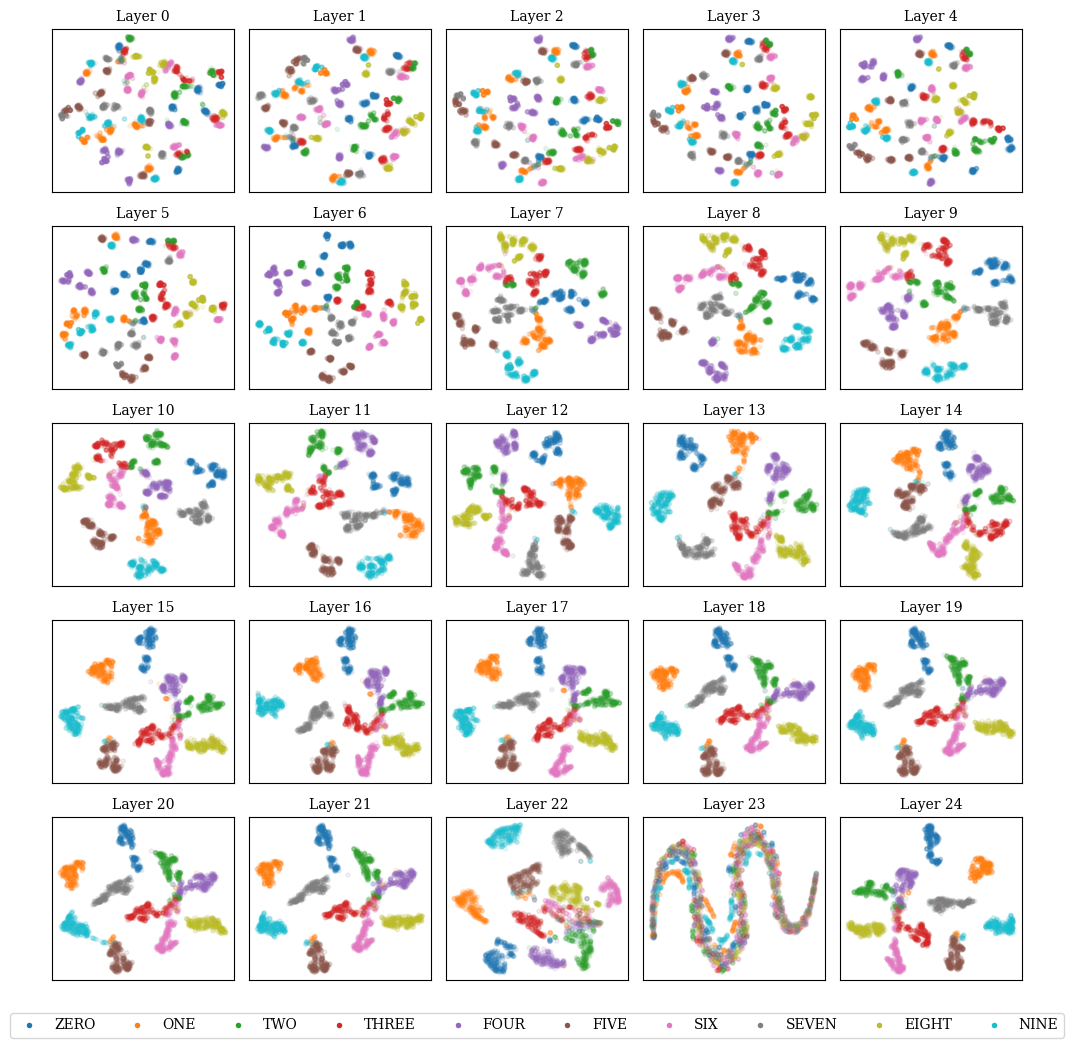

In [376]:
plot_tsne(tsne_layer_representations_large_pt, labels, digit2word, 'w2v2_large_ft_s2t.png')

In [76]:
from sklearn.preprocessing import LabelEncoder

# Convert the categorical list into a list of integers
label_encoder = LabelEncoder()
speaker_ids_encoded = label_encoder.fit_transform(speaker_ids)

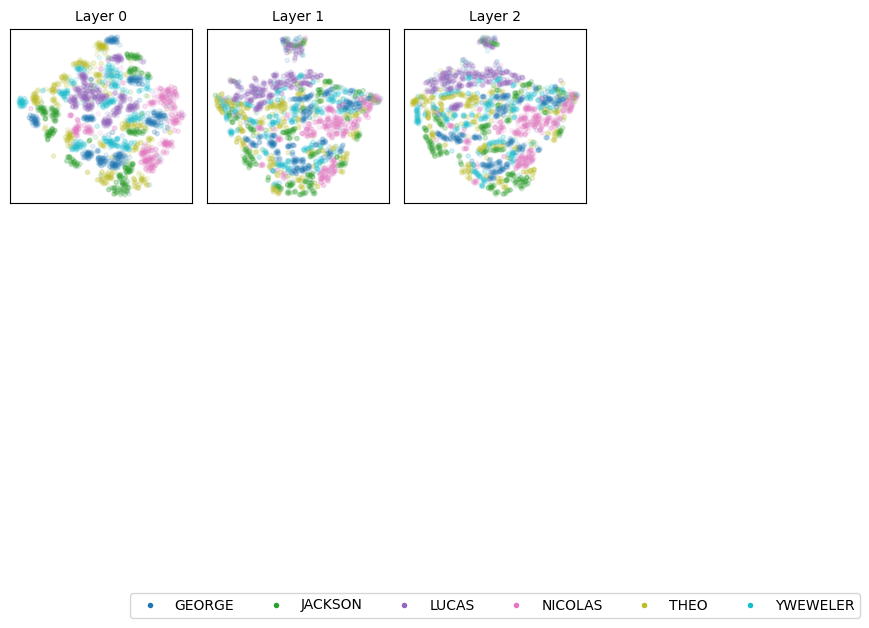

In [77]:
spkr2word = {i: spkr for (i, spkr) in enumerate(np.unique(speaker_ids))}

#plot_tsne(tsne_layer_representations_large_pt, labels, digit2word, 'w2v2_large_pt.png')
plot_tsne(tsne_layer_representations_large_pt, speaker_ids_encoded, spkr2word, 'w2v2_large_ft_s2t_spkr.png')

In [378]:
# file_path = "../wav2vec2_vectors/pt/layer_reprs_large_pooled_pt.pkl"

# with open(file_path, "rb") as file:
#     layer_reprs_ft = pickle.load(file)


In [379]:
#tsne_layer_representations_large_ft = calculate_tsne_layer_representations(layer_reprs_ft)

In [380]:
#plot_tsne(tsne_layer_representations_large_ft, labels, digit2word, 'w2v2_large_ft.png')

In [381]:
#plot_tsne(tsne_layer_representations_large_ft, speaker_ids_encoded, spkr2word, 'w2v2_large_ft_spkr.png')

In [25]:
def k_means(kmeans_paras, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    #t0 = time()
    estimator = make_pipeline(kmeans_paras).fit(data) #StandardScaler(), 
    clustering_metrics = [
        #metrics.homogeneity_score,
        #metrics.completeness_score,
        metrics.v_measure_score,
        #metrics.adjusted_rand_score,
        #metrics.adjusted_mutual_info_score,
    ]
    results = [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    return results

In [26]:
random_seeds = [42, 321, 1234, 4321, 2345, 54321, 
    34567, 45678, 56789, 67890, 98765, 
    87654, 76543, 65432, 54321, 43210, 
    32109, 21098, 10987, 9876, 8765,
    7654, 6543, 5432, 4321
]

layer2vmeasure = defaultdict(list)

for layer_idx in range(0, 25):
    layer_representations = [layer_reprs[sample_ID][layer_idx] for sample_ID in layer_reprs]

    for i, _rand in enumerate(random_seeds):
        kmeans = KMeans(init="k-means++", n_clusters=10, n_init='auto', random_state=_rand)
        clustering_perf = k_means(kmeans_paras=kmeans, data=layer_representations, labels=labels)
        
        print(f"{i:.2f} Layer {layer_idx+1:<3} v-measure {clustering_perf[0]:.3f}", end='\n')
        layer2vmeasure[layer_idx].append(clustering_perf[0])
    
    #print('')


0.00 Layer 1   v-measure 0.352
1.00 Layer 1   v-measure 0.354
2.00 Layer 1   v-measure 0.338
3.00 Layer 1   v-measure 0.327
4.00 Layer 1   v-measure 0.354
5.00 Layer 1   v-measure 0.337
6.00 Layer 1   v-measure 0.329
7.00 Layer 1   v-measure 0.315
8.00 Layer 1   v-measure 0.355
9.00 Layer 1   v-measure 0.335
10.00 Layer 1   v-measure 0.323
11.00 Layer 1   v-measure 0.332
12.00 Layer 1   v-measure 0.347
13.00 Layer 1   v-measure 0.318
14.00 Layer 1   v-measure 0.337
15.00 Layer 1   v-measure 0.343
16.00 Layer 1   v-measure 0.341
17.00 Layer 1   v-measure 0.356
18.00 Layer 1   v-measure 0.347
19.00 Layer 1   v-measure 0.339
20.00 Layer 1   v-measure 0.368
21.00 Layer 1   v-measure 0.344
22.00 Layer 1   v-measure 0.324
23.00 Layer 1   v-measure 0.343
24.00 Layer 1   v-measure 0.327
0.00 Layer 2   v-measure 0.349
1.00 Layer 2   v-measure 0.324
2.00 Layer 2   v-measure 0.348
3.00 Layer 2   v-measure 0.363
4.00 Layer 2   v-measure 0.367
5.00 Layer 2   v-measure 0.366
6.00 Layer 2   v-measure

In [385]:
layer2vmeasure_ft = defaultdict(list)

for layer_idx in range(0, 25):
    layer_representations = [layer_reprs_ft[sample_ID][layer_idx] for sample_ID in layer_reprs]

    for i, _rand in enumerate(random_seeds):
        kmeans = KMeans(init="k-means++", n_clusters=10, n_init='auto', random_state=_rand)
        clustering_perf = k_means(kmeans_paras=kmeans, data=layer_representations, labels=labels)
        
        #print(f"{i:.2f} Layer {layer_idx+1:<3} v-measure {clustering_perf[0]:.3f}", end='\n')
        layer2vmeasure_ft[layer_idx].append(clustering_perf[0])

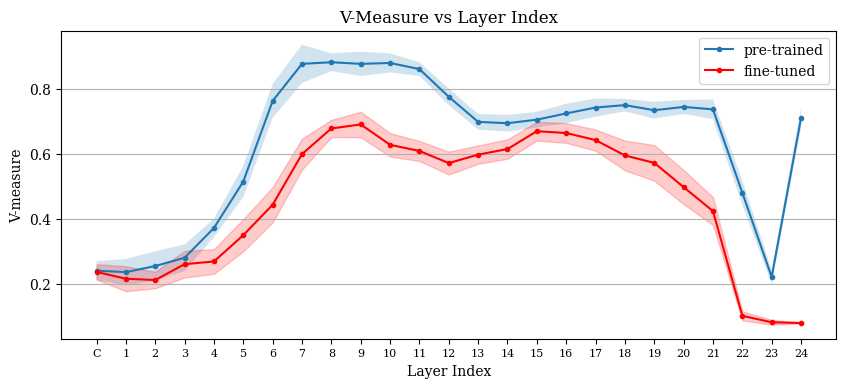

In [386]:

# Set the font family to LaTeX
plt.rcParams["font.family"] = "serif"

# FILEPATH: /nethome/babdullah/explore.speech.wav2vec2/visuallize_and_analyze_representations.ipynb
layer_indices = list(layer2vmeasure_ft.keys())
vmeasure_means_pt = [np.mean(layer2vmeasure[layer_idx]) for layer_idx in layer_indices]
vmeasure_std_pt = [np.std(layer2vmeasure[layer_idx]) for layer_idx in layer_indices]
vmeasure_means_ft = [np.mean(layer2vmeasure_ft[layer_idx]) for layer_idx in layer_indices]
vmeasure_std_ft = [np.std(layer2vmeasure_ft[layer_idx]) for layer_idx in layer_indices]

fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the figsize parameter to make the plot wider

ax.plot(layer_indices, vmeasure_means_pt, 'o-', label='pre-trained', markersize=3)
ax.plot(layer_indices, vmeasure_means_ft, 'o-', label='fine-tuned', color='red', markersize=3)
ax.fill_between(layer_indices, np.array(vmeasure_means_pt) - np.array(vmeasure_std_pt), np.array(vmeasure_means_pt) + np.array(vmeasure_std_pt), alpha=0.2)
ax.fill_between(layer_indices, np.array(vmeasure_means_ft) - np.array(vmeasure_std_ft), np.array(vmeasure_means_ft) + np.array(vmeasure_std_ft), alpha=0.2, color='red')

ax.set_xlabel('Layer Index')
ax.set_ylabel('V-measure')
tickvalues = range(0, 25)
ax.set_xticks(ticks=tickvalues, labels=['C'] + list(range(1, 25, 1)), fontsize=8)

# Add grid only to the vertical axis
ax.yaxis.grid()

ax.set_title('V-Measure vs Layer Index')
ax.legend()
plt.show()


In [387]:
layer2vmeasure_spkr= defaultdict(list)

for layer_idx in range(0, 25):
    layer_representations = [layer_reprs[sample_ID][layer_idx] for sample_ID in layer_reprs]

    for i, _rand in enumerate(random_seeds):
        kmeans = KMeans(init="k-means++", n_clusters=6, n_init='auto', random_state=_rand)
        clustering_perf = k_means(kmeans_paras=kmeans, data=layer_representations, labels=speaker_ids_encoded)
        
        #print(f"{i:.2f} Layer {layer_idx+1:<3} v-measure {clustering_perf[0]:.3f}", end='\n')
        layer2vmeasure_spkr[layer_idx].append(clustering_perf[0])

In [388]:
layer2vmeasure_ft_spkr= defaultdict(list)

for layer_idx in range(0, 25):
    layer_representations = [layer_reprs_ft[sample_ID][layer_idx] for sample_ID in layer_reprs]

    for i, _rand in enumerate(random_seeds):
        kmeans = KMeans(init="k-means++", n_clusters=6, n_init='auto', random_state=_rand)
        clustering_perf = k_means(kmeans_paras=kmeans, data=layer_representations, labels=speaker_ids_encoded)
        
        #print(f"{i:.2f} Layer {layer_idx+1:<3} v-measure {clustering_perf[0]:.3f}", end='\n')
        layer2vmeasure_ft_spkr[layer_idx].append(clustering_perf[0])

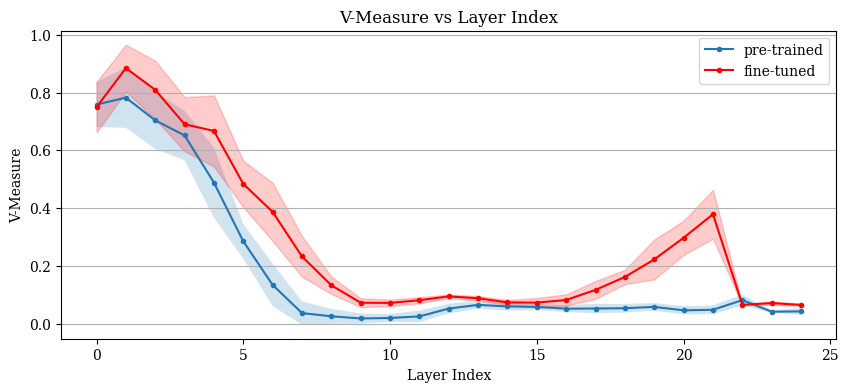

In [389]:
layer_indices = list(layer2vmeasure_spkr.keys())
vmeasure_means_pt = [np.mean(layer2vmeasure_spkr[layer_idx]) for layer_idx in layer_indices]
vmeasure_std_pt = [np.std(layer2vmeasure_spkr[layer_idx]) for layer_idx in layer_indices]
vmeasure_means_ft = [np.mean(layer2vmeasure_ft_spkr[layer_idx]) for layer_idx in layer_indices]
vmeasure_std_ft = [np.std(layer2vmeasure_ft_spkr[layer_idx]) for layer_idx in layer_indices]

fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the figsize parameter to make the plot wider

ax.plot(layer_indices, vmeasure_means_pt, '-o', label='pre-trained', markersize=3)
ax.fill_between(layer_indices, np.array(vmeasure_means_pt) - np.array(vmeasure_std_pt), np.array(vmeasure_means_pt) + np.array(vmeasure_std_pt), alpha=0.2)
ax.plot(layer_indices, vmeasure_means_ft, '-o', color='red', label='fine-tuned', markersize=3)
ax.fill_between(layer_indices, np.array(vmeasure_means_ft) - np.array(vmeasure_std_ft), np.array(vmeasure_means_ft) + np.array(vmeasure_std_ft), alpha=0.2, color='red')
ax.set_xlabel('Layer Index')
ax.set_ylabel('V-Measure')
ax.set_title('V-Measure vs Layer Index')
# Add grid only to the vertical axis
ax.yaxis.grid()
ax.legend()
plt.show()


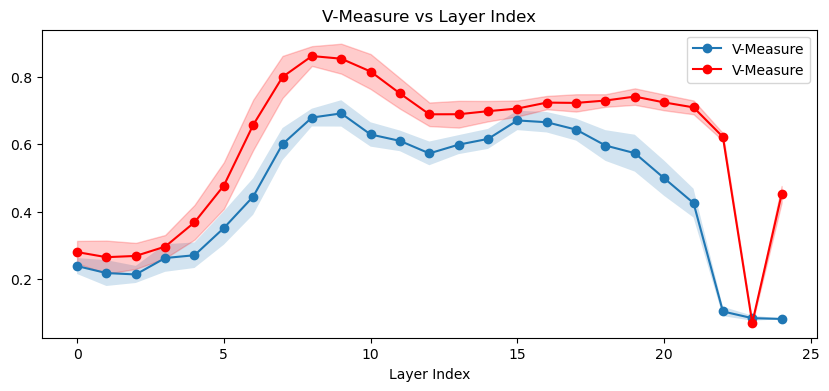

In [161]:
layer_indices = list(layer2vmeasure_ft.keys())
vmeasure_means_ft = [np.mean(layer2vmeasure_ft[layer_idx]) for layer_idx in layer_indices]
vmeasure_std_ft = [np.std(layer2vmeasure_ft[layer_idx]) for layer_idx in layer_indices]

fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the figsize parameter to make the plot wider

ax.plot(layer_indices, vmeasure_means, 'o-', label='V-Measure')
ax.plot(layer_indices, vmeasure_means_ft, 'o-', label='V-Measure', color='red')
ax.fill_between(layer_indices, np.array(vmeasure_means) - np.array(vmeasure_std), np.array(vmeasure_means) + np.array(vmeasure_std), alpha=0.2)
ax.fill_between(layer_indices, np.array(vmeasure_means_ft) - np.array(vmeasure_std_ft), np.array(vmeasure_means_ft) + np.array(vmeasure_std_ft), alpha=0.2, color='red')
ax.set_xlabel('Layer Index')
#ax.set_ylabel('V-Measure')
ax.set_title('V-Measure vs Layer Index')
ax.legend()
plt.show()


In [ ]:
layer2vmeasure_spkr= defaultdict(list)

for layer_idx in range(0, 25):
    layer_representations = [layer_reprs[sample_ID][layer_idx] for sample_ID in layer_reprs]

    for i, _rand in enumerate(random_seeds):
        kmeans = KMeans(init="k-means++", n_clusters=6, n_init='auto', random_state=_rand)
        clustering_perf = k_means(kmeans_paras=kmeans, data=layer_representations, labels=speaker_ids_encoded)
        
        #print(f"{i:.2f} Layer {layer_idx+1:<3} v-measure {clustering_perf[0]:.3f}", end='\n')
        layer2vmeasure_spkr[layer_idx].append(clustering_perf[0])

In [21]:

print("\t\tinit\t\ttime\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print(92* "_")

#Get the representations from the current layer
for layer_idx in range(0, 25):
    layer_representations = [layer_reprs[sample_ID][layer_idx].mean(dim=1).squeeze().numpy() for sample_ID in layer_reprs]

    
    print(f"Layer {layer_idx+1:<3}", end='\t')

    kmeans = KMeans(init="k-means++", n_clusters=10, n_init='auto', random_state=123)
    clustering_perf = k_means(kmeans=kmeans, name="k-means++", data=layer_representations, labels=labels)
    print()


		init		time	homo	compl	v-meas	ARI	AMI	silhouette
____________________________________________________________________________________________
Layer 1  	k-means++	0.198s	0.231	0.236	0.233	0.095	0.229	0.170
Layer 2  	k-means++	0.200s	0.227	0.232	0.229	0.084	0.225	0.125
Layer 3  	k-means++	0.212s	0.212	0.216	0.214	0.076	0.209	0.106
Layer 4  	k-means++	0.212s	0.245	0.257	0.251	0.103	0.246	0.102
Layer 5  	k-means++	0.160s	0.284	0.294	0.289	0.129	0.284	0.085
Layer 6  	k-means++	0.151s	0.403	0.416	0.409	0.220	0.406	0.099
Layer 7  	k-means++	0.166s	0.511	0.523	0.517	0.343	0.514	0.099
Layer 8  	k-means++	0.153s	0.632	0.666	0.649	0.485	0.647	0.108
Layer 9  	k-means++	0.190s	0.687	0.708	0.697	0.553	0.695	0.104
Layer 10 	k-means++	0.225s	0.708	0.721	0.715	0.595	0.713	0.113
Layer 11 	k-means++	0.361s	0.606	0.632	0.619	0.504	0.617	0.094
Layer 12 	k-means++	0.181s	0.612	0.641	0.626	0.493	0.623	0.084
Layer 13 	k-means++	0.145s	0.552	0.589	0.570	0.406	0.567	0.085
Layer 14 	k-means++	0.192s	0.569	0.577